In [2]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

df = pd.read_csv('GFM_data.csv', sep = '\t')

def helper(x):
    ## if string will make numeric
    if isinstance(x,str):
        x = x.replace(',','')
        ## if has ".1k" will change to numeric
        if '.' in x and 'K' in x:
            x = x.replace('.','')
            x = x.replace('K','00')
        ## if "k" will change to numeric
        if 'K' in x:
            x = x.replace('K','000')
        return x
    ## return nan
    else:
        return x


df['Number_of_Donations'] = df['Number_of_Donations'].apply(helper).astype(float)
df['FB_Shares'] = df['FB_Shares'].apply(helper).astype(float)
df['Number_of_Donors'] = df['Number_of_Donors'].apply(helper).astype(float)
df['Followers'] = df['Followers'].apply(helper).astype(float)
df = df.dropna()
df['Length_of_Fundraising']= df['Length_of_Fundraising'].apply(lambda x: int(x[:-24]))
#df['Length_of_Fundraising'] = pd.Series(preprocessing.scale(df['Length_of_Fundraising'].values))
df

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",2296580.0,3000000.0,72900.0,72,118000.0,72500.0,73400.0,On August 23rd my son was shot multiple times ...
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",1831590.0,1000000.0,22000.0,184,71300.0,21500.0,21600.0,\nThe Navajo Nation COVID-19 Fund has been est...
2,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,0,"Rest up, Tommy, we'll see you soon","Raised $105,973 from 1795 donations",652554.0,1000000.0,11000.0,110,20800.0,10100.0,10200.0,"First, thank you for being here. Tommy Rivers ..."
3,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",570299.0,750000.0,24700.0,154,5500.0,24300.0,24500.0,My name is Melissa Green and I am the mother o...
4,0,https://www.gofundme.com/f/please-help-me-in-t...,Medical,1,PLEASE HELP ME IN THE BATTLE FOR MY LIFE,"New Milford, NJ",498256.0,600000.0,7800.0,20,6600.0,7700.0,7900.0,PLEASE HELP ME IN THE BATTLE FOR MY LIFE. My n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,https://www.gofundme.com/f/breelynnstrong,Wishes,14,#breelynnstrong,"Jamestown, IN",24374.0,30000.0,420.0,29,1400.0,418.0,419.0,"\n#breelynnstrongDiffuse midline glioma, also ..."
776,0,https://www.gofundme.com/f/rebecca-trimble-mak...,Wishes,14,"Rebecca Trimble - Make America ""Home"" - Legal ...","Bethel, AK",24162.0,25000.0,275.0,120,2600.0,272.0,274.0,A Woman Without A Country - New York Times Art...
777,0,https://www.gofundme.com/f/help-mr-walter-get-...,Wishes,15,(TEMP. ON PAUSE) Help Mr Walter get A NEW HOME!!,"Tallahassee, FL",23565.0,100000.0,1100.0,121,3900.0,1100.0,1100.0,***EDIT: This fundraiser is temporarily on pau...
778,0,https://www.gofundme.com/f/Aylas-Fundraiser,Wishes,15,Ayla’s Fundraiser,"North Grafton, MA",22825.0,1000.0,352.0,72,1700.0,347.0,349.0,My niece Megan was recently taken from us and ...


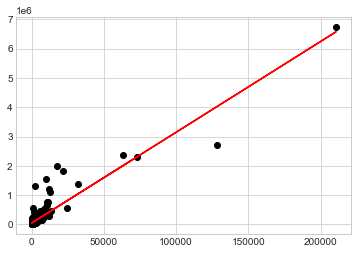

In [44]:
x = df['Number_of_Donations']
y = df['Amount_Raised']
plt.plot(x, y, 'o', color='black')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#use red as color for regression line
plt.plot(x, m*x+b, color='red')

In [3]:
mod = sm.OLS(df['Amount_Raised'], df['Number_of_Donations'])
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
X2 = sm.add_constant(x.values)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Amount_Raised   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     4565.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          2.06e-320
Time:                        15:12:16   Log-Likelihood:                -9850.4
No. Observations:                 749   AIC:                         1.970e+04
Df Residuals:                     747   BIC:                         1.971e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.629e+04   4631.464      9.995      0.0

In [4]:
p_values

Number_of_Donations    4.017380e-315
Name: P>|t|, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:46: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1774: RuntimeWarning: divide by zero encountered in double_scalars
  return self.mse_model/self.mse_resid


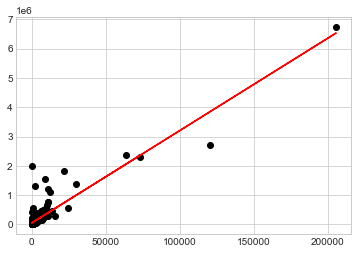

In [45]:
x = df['Followers']
y = df['Amount_Raised']
plt.plot(x, y, 'o', color='black')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#use red as color for regression line
plt.plot(x, m*x+b, color='red')
mod = sm.OLS(df['Followers'], df['Followers'])
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [6]:
mod = sm.OLS(df['Followers'], df['Amount_Raised'])
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
X2 = sm.add_constant(x.values)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Amount_Raised   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     3902.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          8.76e-299
Time:                        15:12:16   Log-Likelihood:                -9900.3
No. Observations:                 749   AIC:                         1.980e+04
Df Residuals:                     747   BIC:                         1.981e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.713e+04   4950.165      9.522      0.0

In [7]:
p_values

Amount_Raised    3.013380e-295
Name: P>|t|, dtype: float64

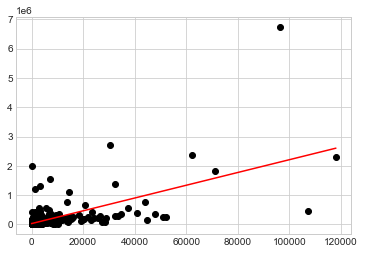

In [8]:
x = df['FB_Shares']
y = df['Amount_Raised']
plt.plot(x, y, 'o', color='black')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#use red as color for regression line
plt.plot(x, m*x+b, color='red')

In [9]:
mod = sm.OLS(df['FB_Shares'], df['Amount_Raised'])
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
X2 = sm.add_constant(x.values)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Amount_Raised   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     520.1
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           8.89e-88
Time:                        15:12:17   Log-Likelihood:                -10387.
No. Observations:                 749   AIC:                         2.078e+04
Df Residuals:                     747   BIC:                         2.079e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.953e+04   9858.585      2.995      0.0

In [10]:
p_values

Amount_Raised    1.194993e-100
Name: P>|t|, dtype: float64

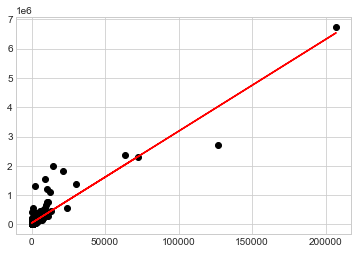

In [46]:
x = df['Number_of_Donors']
y = df['Amount_Raised']
plt.plot(x, y, 'o', color='black')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#use red as color for regression line
plt.plot(x, m*x+b, color='red')

In [12]:
mod = sm.OLS(df['Number_of_Donors'], df['Amount_Raised'])
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
X2 = sm.add_constant(x.values)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Amount_Raised   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     4312.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          1.66e-312
Time:                        15:12:17   Log-Likelihood:                -9868.7
No. Observations:                 749   AIC:                         1.974e+04
Df Residuals:                     747   BIC:                         1.975e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.704e+04   4744.295      9.915      0.0

In [13]:
p_values

Amount_Raised    1.636532e-307
Name: P>|t|, dtype: float64

In [14]:
mean_graph = df.groupby('Category').mean().sort_values(by='Amount_Raised')
mean_graph

,Unnamed: 0,Position,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers
Category,,,,,,,,,
Competition,0.0,11.536232,2822.420290,4790.579710,32.898551,95.681159,140.985507,32.101449,32.028986
Newlywed,0.0,11.557143,3927.542857,20586.514286,36.185714,96.571429,100.285714,35.042857,34.485714
Travel,0.0,11.215385,9437.784615,12519.400000,107.353846,108.061538,334.815385,99.076923,92.200000
Event,0.0,9.563636,15469.745455,40340.654545,179.545455,113.909091,619.709091,175.672727,175.054545
Sports,0.0,11.366197,25214.140845,53612.957746,209.014085,99.450704,585.084507,201.619718,200.774648
Faith,0.0,5.400000,45424.857143,147325.285714,496.314286,116.685714,1518.885714,475.628571,466.828571
Creative,0.0,11.492958,47777.281690,92149.549296,587.633803,102.014085,1829.647887,571.014085,572.309859
Education,0.0,7.531915,75232.765957,120319.170213,598.957447,99.680851,1104.765957,585.936170,569.276596
Business,0.0,3.454545,170057.318182,232954.545455,2876.727273,118.727273,8000.000000,2811.954545,2830.181818


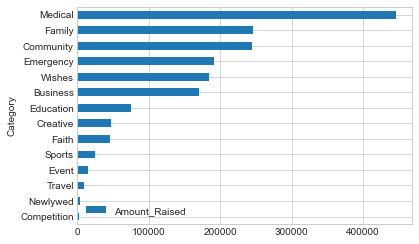

In [15]:
mean_graph.plot(kind = 'barh', y = 'Amount_Raised')

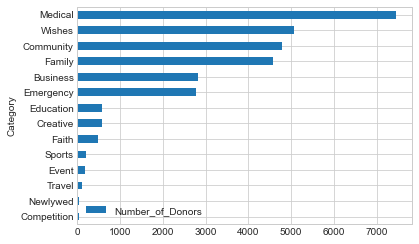

In [16]:
mean_donors = df.groupby('Category').mean().sort_values(by = 'Number_of_Donors')
mean_donors.plot(kind = 'barh', y = 'Number_of_Donors')

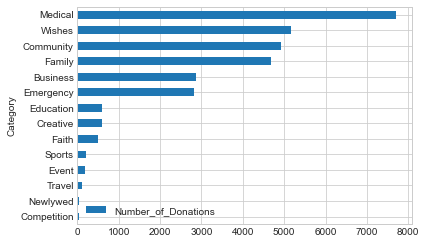

In [17]:
mean_donations = df.groupby('Category').mean().sort_values(by = 'Number_of_Donations')
mean_donors.plot(kind = 'barh', y = 'Number_of_Donations')

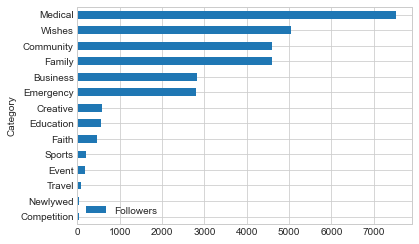

In [18]:
mean_followers = df.groupby('Category').mean().sort_values(by = 'Followers')
mean_followers.plot(kind = 'barh', y = 'Followers')

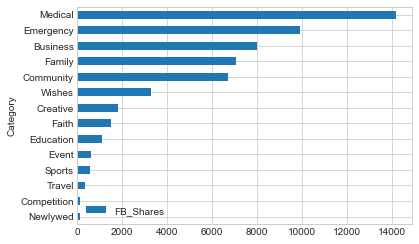

In [19]:
mean_shares = df.groupby('Category').mean().sort_values(by = 'FB_Shares')
mean_shares.plot(kind = 'barh', y = 'FB_Shares')

In [20]:
median_table = df.groupby('Category').median()
median_table

,Unnamed: 0,Position,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers
Category,,,,,,,,,
Business,0.0,3.5,115857.5,162500.0,2150.0,147.0,4400.0,2050.0,2100.0
Community,0.0,11.0,104923.0,100000.0,1650.0,152.5,2250.0,1500.0,1500.0
Competition,0.0,12.0,1625.0,3000.0,25.0,92.0,89.0,24.0,24.0
Creative,0.0,11.0,34999.0,50000.0,433.0,99.0,1100.0,429.0,428.0
Education,0.0,8.0,69010.0,100000.0,354.0,108.0,722.0,339.0,328.0
Emergency,0.0,11.5,159730.5,192500.0,1850.0,84.5,4100.0,1800.0,1850.0
Event,0.0,10.0,12300.0,15000.0,145.0,120.0,431.0,141.0,139.0
Faith,0.0,5.0,31670.0,75000.0,174.0,133.0,464.0,151.0,148.0
Family,0.0,3.0,122907.0,120000.0,956.0,88.0,2700.0,932.0,941.0


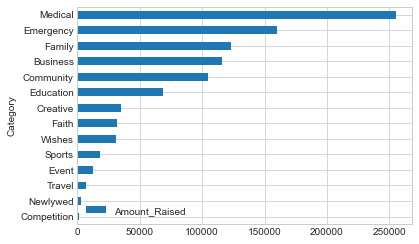

In [21]:
median_table.sort_values(by='Amount_Raised').plot(kind = 'barh', y= 'Amount_Raised')

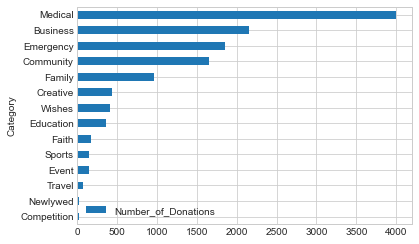

In [22]:
median_table.sort_values(by='Number_of_Donations').plot(kind = 'barh', y= 'Number_of_Donations')

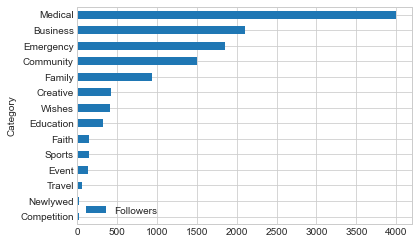

In [23]:
median_table.sort_values(by='Followers').plot(kind = 'barh', y= 'Followers')

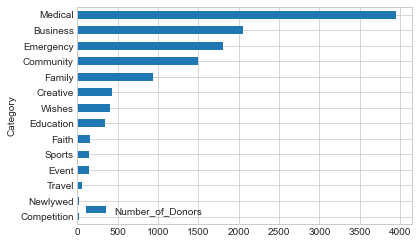

In [24]:
median_table.sort_values(by='Number_of_Donors').plot(kind = 'barh', y= 'Number_of_Donors')

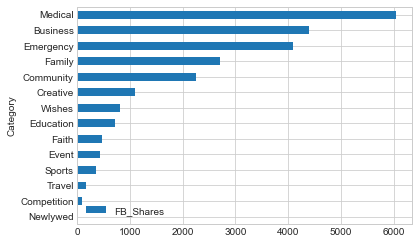

In [25]:
median_table.sort_values(by='FB_Shares').plot(kind = 'barh', y= 'FB_Shares')

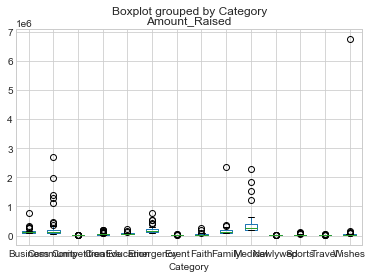

In [26]:
boxplot = df.boxplot('Amount_Raised', by='Category')
boxplot

In [48]:
shuffled_table = df.assign(
ShuffledAmountRaised=np.random.permutation(df.get('Amount_Raised'))
).groupby('Category').mean()
shuffled_table

,Unnamed: 0,Position,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,ShuffledAmountRaised
Category,,,,,,,,,,
Business,0.0,3.454545,170057.318182,232954.545455,2876.727273,118.727273,8000.000000,2811.954545,2830.181818,63147.000000
Community,0.0,11.400000,244523.214286,274193.414286,4916.842857,132.414286,6681.257143,4774.014286,4596.528571,77815.914286
Competition,0.0,11.536232,2822.420290,4790.579710,32.898551,95.681159,140.985507,32.101449,32.028986,61806.652174
Creative,0.0,11.492958,47777.281690,92149.549296,587.633803,102.014085,1829.647887,571.014085,572.309859,95050.605634
Education,0.0,7.531915,75232.765957,120319.170213,598.957447,99.680851,1104.765957,585.936170,569.276596,73257.978723
Emergency,0.0,11.558824,190897.367647,282119.117647,2814.088235,92.558824,9910.014706,2770.720588,2806.264706,81578.323529
Event,0.0,9.563636,15469.745455,40340.654545,179.545455,113.909091,619.709091,175.672727,175.054545,239908.054545
Faith,0.0,5.400000,45424.857143,147325.285714,496.314286,116.685714,1518.885714,475.628571,466.828571,77655.514286
Family,0.0,3.478261,246193.869565,323265.217391,4669.565217,96.391304,7060.260870,4586.260870,4593.347826,76664.565217


In [3]:
df

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",2296580.0,3000000.0,72900.0,72,118000.0,72500.0,73400.0,On August 23rd my son was shot multiple times ...
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",1831590.0,1000000.0,22000.0,184,71300.0,21500.0,21600.0,\nThe Navajo Nation COVID-19 Fund has been est...
2,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,0,"Rest up, Tommy, we'll see you soon","Raised $105,973 from 1795 donations",652554.0,1000000.0,11000.0,110,20800.0,10100.0,10200.0,"First, thank you for being here. Tommy Rivers ..."
3,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",570299.0,750000.0,24700.0,154,5500.0,24300.0,24500.0,My name is Melissa Green and I am the mother o...
4,0,https://www.gofundme.com/f/please-help-me-in-t...,Medical,1,PLEASE HELP ME IN THE BATTLE FOR MY LIFE,"New Milford, NJ",498256.0,600000.0,7800.0,20,6600.0,7700.0,7900.0,PLEASE HELP ME IN THE BATTLE FOR MY LIFE. My n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,https://www.gofundme.com/f/breelynnstrong,Wishes,14,#breelynnstrong,"Jamestown, IN",24374.0,30000.0,420.0,29,1400.0,418.0,419.0,"\n#breelynnstrongDiffuse midline glioma, also ..."
776,0,https://www.gofundme.com/f/rebecca-trimble-mak...,Wishes,14,"Rebecca Trimble - Make America ""Home"" - Legal ...","Bethel, AK",24162.0,25000.0,275.0,120,2600.0,272.0,274.0,A Woman Without A Country - New York Times Art...
777,0,https://www.gofundme.com/f/help-mr-walter-get-...,Wishes,15,(TEMP. ON PAUSE) Help Mr Walter get A NEW HOME!!,"Tallahassee, FL",23565.0,100000.0,1100.0,121,3900.0,1100.0,1100.0,***EDIT: This fundraiser is temporarily on pau...
778,0,https://www.gofundme.com/f/Aylas-Fundraiser,Wishes,15,Ayla’s Fundraiser,"North Grafton, MA",22825.0,1000.0,352.0,72,1700.0,347.0,349.0,My niece Megan was recently taken from us and ...


In [37]:
df.groupby('Category').count()

,Unnamed: 0,Url,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text
Category,,,,,,,,,,,,,
Business,22,22,22,22,22,22,22,22,22,22,22,22,22
Community,70,70,70,70,70,70,70,70,70,70,70,70,70
Competition,69,69,69,69,69,69,69,69,69,69,69,69,69
Creative,71,71,71,71,71,71,71,71,71,71,71,71,71
Education,47,47,47,47,47,47,47,47,47,47,47,47,47
Emergency,68,68,68,68,68,68,68,68,68,68,68,68,68
Event,55,55,55,55,55,55,55,55,55,55,55,55,55
Faith,35,35,35,35,35,35,35,35,35,35,35,35,35
Family,23,23,23,23,23,23,23,23,23,23,23,23,23


In [44]:
def to_integer(x):
    d = {'Business': 1, 'Community': 2, 'Competition': 3, 'Creative': 4, 'Education': 5, 'Emergency': 6, 'Event': 7, 'Faith': 8, 'Family':9, 'Medical': 10, 'Newlywed':11, 'Sports':12, 'Travel':13, 'Wishes': 14}
    return d[x]

8

In [49]:
new_column = df.get('Category').apply(to_integer)
df = df.assign(Categorical_Assign = new_column)
df

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text,Categorical_Assign
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",2296580.0,3000000.0,72900.0,72,118000.0,72500.0,73400.0,On August 23rd my son was shot multiple times ...,10
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",1831590.0,1000000.0,22000.0,184,71300.0,21500.0,21600.0,\nThe Navajo Nation COVID-19 Fund has been est...,10
2,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,0,"Rest up, Tommy, we'll see you soon","Raised $105,973 from 1795 donations",652554.0,1000000.0,11000.0,110,20800.0,10100.0,10200.0,"First, thank you for being here. Tommy Rivers ...",10
3,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",570299.0,750000.0,24700.0,154,5500.0,24300.0,24500.0,My name is Melissa Green and I am the mother o...,10
4,0,https://www.gofundme.com/f/please-help-me-in-t...,Medical,1,PLEASE HELP ME IN THE BATTLE FOR MY LIFE,"New Milford, NJ",498256.0,600000.0,7800.0,20,6600.0,7700.0,7900.0,PLEASE HELP ME IN THE BATTLE FOR MY LIFE. My n...,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0,https://www.gofundme.com/f/breelynnstrong,Wishes,14,#breelynnstrong,"Jamestown, IN",24374.0,30000.0,420.0,29,1400.0,418.0,419.0,"\n#breelynnstrongDiffuse midline glioma, also ...",14
776,0,https://www.gofundme.com/f/rebecca-trimble-mak...,Wishes,14,"Rebecca Trimble - Make America ""Home"" - Legal ...","Bethel, AK",24162.0,25000.0,275.0,120,2600.0,272.0,274.0,A Woman Without A Country - New York Times Art...,14
777,0,https://www.gofundme.com/f/help-mr-walter-get-...,Wishes,15,(TEMP. ON PAUSE) Help Mr Walter get A NEW HOME!!,"Tallahassee, FL",23565.0,100000.0,1100.0,121,3900.0,1100.0,1100.0,***EDIT: This fundraiser is temporarily on pau...,14
778,0,https://www.gofundme.com/f/Aylas-Fundraiser,Wishes,15,Ayla’s Fundraiser,"North Grafton, MA",22825.0,1000.0,352.0,72,1700.0,347.0,349.0,My niece Megan was recently taken from us and ...,14


In [ ]:
#assign states to numbers

In [50]:
reg_df = df[['Amount_Raised', 'Goal', 'Number_of_Donations', 'FB_Shares', 'Number_of_Donors', 'Followers']].copy()

In [51]:
target_column = ['Amount_Raised']
predictors = list(set(list(reg_df.columns))-set(target_column))
reg_df[predictors] = reg_df[predictors]/reg_df[predictors].max()
reg_df['Category'] = df['Category']
reg_df = reg_df.dropna()
reg_df

,Amount_Raised,Goal,Number_of_Donations,FB_Shares,Number_of_Donors,Followers,Category
0,2296580.0,1.000000,0.346154,1.000000,0.350242,0.357004,Medical
1,1831590.0,0.333333,0.104463,0.604237,0.103865,0.105058,Medical
2,652554.0,0.333333,0.052232,0.176271,0.048792,0.049611,Medical
3,570299.0,0.250000,0.117284,0.046610,0.117391,0.119163,Medical
4,498256.0,0.200000,0.037037,0.055932,0.037198,0.038424,Medical
...,...,...,...,...,...,...,...
775,24374.0,0.010000,0.001994,0.011864,0.002019,0.002038,Wishes
776,24162.0,0.008333,0.001306,0.022034,0.001314,0.001333,Wishes
777,23565.0,0.033333,0.005223,0.033051,0.005314,0.005350,Wishes
778,22825.0,0.000333,0.001671,0.014407,0.001676,0.001697,Wishes


In [53]:
X = df[predictors].values
y = df[target_column].values

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(524, 5)
(225, 5)


In [75]:
rr = Ridge(alpha=0)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

69228.82351151365
0.9008839467744278


In [76]:
pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

166260.20577085434
0.891050441888563


In [57]:
from sklearn.linear_model import RidgeCV
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [69]:
X = df[predictors].values
y = df[target_column].values
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [72]:
regr_cv = RidgeCV(alphas=[0.00000000000001, 0.01, 0.1, 1.0, 10.0])

In [73]:
model_cv = regr_cv.fit(X_std, y)
model_cv

RidgeCV(alphas=array([1.e-14, 1.e-02, 1.e-01, 1.e+00, 1.e+01]))

In [74]:
model_cv.alpha_

1e-14